# Preparation Phase

This Jupyter notebook will explore linear relations in the Chef dataset called: __Apprentice_Chef_Dataset.xlsx__. 

Any doubts about the __metadata__ may be found [here](https://drive.google.com/file/d/1u4fGrWjf-BKtxdPnWSi_y4nzG8tJXy5s/view?usp=sharing)


    

## Loading Packages and Dataset
Using traditional methods learned in class. We will load essential packages as well as the required dataset for the project. Other packages from the scikit library will be loaded as they are requiered during the notebook. 

In [1]:
# Loading essential packages

import pandas as pd    # Data science package
import numpy as np     # Mathematical operations package

import matplotlib.pyplot as plt   # Data visualization 101
import seaborn as sns             # Enhanced data visualization

# Setting the pandas print options 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# File path
file = "./datasets/Apprentice_Chef_Dataset.xlsx"

# Reading the file
chef = pd.read_excel(io = file)

# Ensuring everything is correct so far
chef.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [2]:
# Leaving all columns as lowercase 
chef.columns = chef.columns.str.casefold()

# Checking results
chef.columns

Index(['revenue', 'cross_sell_success', 'name', 'email', 'first_name', 'family_name', 'total_meals_ordered', 'unique_meals_purch', 'contacts_w_customer_service', 'product_categories_viewed', 'avg_time_per_site_visit', 'mobile_number', 'cancellations_before_noon', 'cancellations_after_noon', 'tastes_and_preferences', 'pc_logins', 'mobile_logins', 'weekly_plan', 'early_deliveries', 'late_deliveries', 'package_locker', 'refrigerated_locker', 'avg_prep_vid_time', 'largest_order_size', 'master_classes_attended', 'median_meal_rating', 'avg_clicks_per_visit', 'total_photos_viewed'], dtype='object')

In [3]:
# checking structure of columns
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   revenue                      1946 non-null   float64
 1   cross_sell_success           1946 non-null   int64  
 2   name                         1946 non-null   object 
 3   email                        1946 non-null   object 
 4   first_name                   1946 non-null   object 
 5   family_name                  1899 non-null   object 
 6   total_meals_ordered          1946 non-null   int64  
 7   unique_meals_purch           1946 non-null   int64  
 8   contacts_w_customer_service  1946 non-null   int64  
 9   product_categories_viewed    1946 non-null   int64  
 10  avg_time_per_site_visit      1946 non-null   float64
 11  mobile_number                1946 non-null   int64  
 12  cancellations_before_noon    1946 non-null   int64  
 13  cancellations_afte

## Initial Exploration of the Dataset
In this step we will check for skewness of the response variable, variables of interest and other anomalies in the dataset that may lead to interesting insights. In this case, the response variable will be __revenue__ since it is the total revenue generated by each customer. 

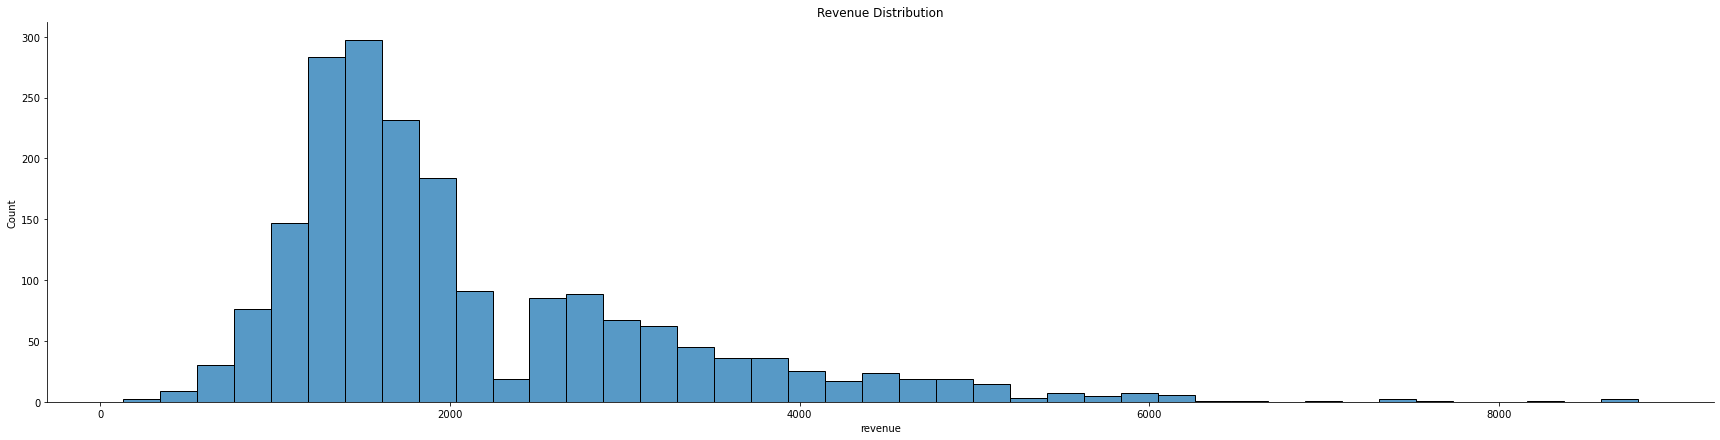

In [4]:
# Histogram regular revenue
sns.displot(data = chef,
            x = 'revenue',
            height = 6,
            aspect = 4)

plt.title("Revenue Distribution")
plt.show()


In [5]:
# Converting Revenue to log_revenue
chef['log_revenue'] = np.log10(chef['revenue'])

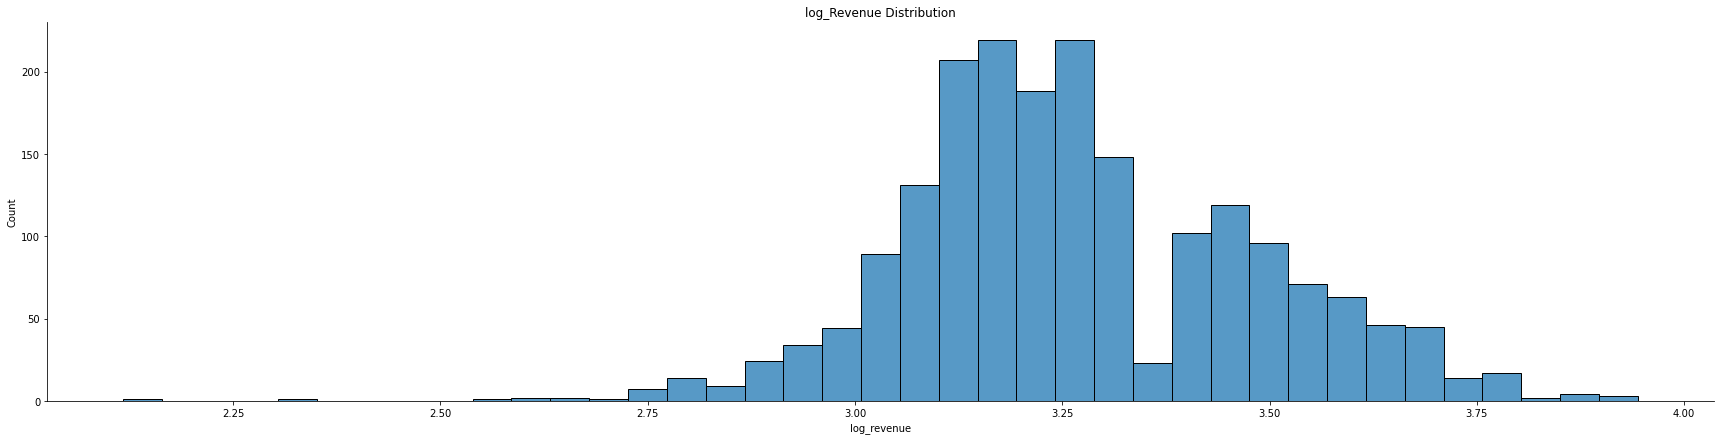

In [6]:
# Histogram with log_revenue
sns.displot(data = chef,
            x = 'log_revenue',
            height = 6,
            aspect = 4)

plt.title("log_Revenue Distribution")
plt.show()

The __log_revenue__ appears to be better distributed than __revenue__ with no treatment. But it is interesting to observe that dip betweem 3.25 and 3.50 in log_revenue. 

### Changing Column names

According to the metadata, LARGEST_ORDER_SIZE is mislabeled and should actually be avg_order_size

In [7]:
chef = chef.rename(columns = {"largest_order_size":"avg_order_size"})


# Checking if it worked
chef.loc[:,['avg_order_size','revenue']].sample(n=5)

,avg_order_size,revenue
175,3,1270.0
499,3,1080.0
1714,6,2880.0
759,4,2595.0
1376,5,3900.0


## Missing Values Treatment
If the missing values are less than 5%, they should be treated as a phenomenon.


In [8]:
# Checking missing values as a proportion
chef.isnull().mean().round(2).sort_values(ascending = False)

family_name                    0.02
revenue                        0.00
pc_logins                      0.00
total_photos_viewed            0.00
avg_clicks_per_visit           0.00
median_meal_rating             0.00
master_classes_attended        0.00
avg_order_size                 0.00
avg_prep_vid_time              0.00
refrigerated_locker            0.00
package_locker                 0.00
late_deliveries                0.00
early_deliveries               0.00
weekly_plan                    0.00
mobile_logins                  0.00
tastes_and_preferences         0.00
cross_sell_success             0.00
cancellations_after_noon       0.00
cancellations_before_noon      0.00
mobile_number                  0.00
avg_time_per_site_visit        0.00
product_categories_viewed      0.00
contacts_w_customer_service    0.00
unique_meals_purch             0.00
total_meals_ordered            0.00
first_name                     0.00
email                          0.00
name                        

Since the missing values of family_name are less than 5% we will not treat them.

## Checking for Zeroes
We will check all of the _non-categroical_ features for an excesive presence of 0's.



After checking via value_counts these are the values of _zero intreset_ (pun intended) 

Values To Check

1.  cancellations_before_noon
2.  weekly_plan
3.  early_deliveries
4.  late_deliveries
5.  master_classes_attended
6.  total_photos_viewed









In [9]:
cancel_bnoon_zeros   = len(chef['cancellations_before_noon'][chef['cancellations_before_noon'] == 0]) 
weekly_plan_zeros   = len(chef['weekly_plan'][chef['weekly_plan'] == 0]) 
early_deliveries_zeros   = len(chef['early_deliveries'][chef['early_deliveries'] == 0]) 
late_deliveries_zeros   = len(chef['late_deliveries'][chef['late_deliveries'] == 0]) 
master_classes_attended_zeroes   = len(chef['master_classes_attended'][chef['master_classes_attended'] == 0]) 
total_photos_viewed_zeros   = len(chef['total_photos_viewed'][chef['total_photos_viewed'] == 0]) 




print(f"""
                                 No\t\tYes
                                ---------------------
cancel_bnoon_zeros              | {cancel_bnoon_zeros}\t\t{len(chef) - cancel_bnoon_zeros}
weekly_plan_zeros               | {weekly_plan_zeros}\t\t{len(chef) - weekly_plan_zeros}
early_deliveries_zeros          | {early_deliveries_zeros}\t\t{len(chef) - early_deliveries_zeros}
late_deliveries_zeros           | {late_deliveries_zeros}\t\t{len(chef) - late_deliveries_zeros}
master_classes_attended_zeroes  | {master_classes_attended_zeroes}\t\t{len(chef) - master_classes_attended_zeroes}
total_photos_viewed_zeros       | {total_photos_viewed_zeros}\t\t{len(chef) - total_photos_viewed_zeros}

""")


                                 No		Yes
                                ---------------------
cancel_bnoon_zeros              | 667		1279
weekly_plan_zeros               | 468		1478
early_deliveries_zeros          | 1167		779
late_deliveries_zeros           | 319		1627
master_classes_attended_zeroes  | 932		1014
total_photos_viewed_zeros       | 1140		806




__interesting output__
- Only total_photos_viewed and early_deliveries have more 0's than other number values
- All observations have at least more than 100 per side.

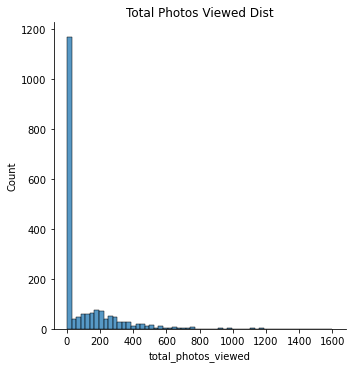

In [10]:
# quick data vis for photos viewed


sns.displot(x = chef['total_photos_viewed'],
           data = chef,
           bins = 'fd')
plt.title("Total Photos Viewed Dist")
plt.show()



### Creating _has_ variables

Following the housing example. We will create new variables with has or has not. E.g. Has attended master classes or has not. This may help our model be better.

In [11]:
# dummy variables 
chef['has_cancel_bnoon'] = 0
chef['has_weekly_plan'] = 0
chef['has_early_deliveries'] = 0
chef['has_late_deliveries'] = 0
chef['has_master_classes_attended'] = 0
chef['has_total_photos_viewed'] = 0


# changing values in the new feature columns.
for index, value in chef.iterrows():
    
    # has_cancel_bnoon 
    if chef.loc[index , 'cancellations_before_noon'] > 0:
        chef.loc[index , 'has_cancel_bnoon'] = 1
        
    # has_weekly_plan 
    if chef.loc[index , 'weekly_plan'] > 0:
        chef.loc[index , 'has_weekly_plan'] = 1
        
    # has_early_deliveries 
    if chef.loc[index , 'early_deliveries'] > 0:
        chef.loc[index , 'has_early_deliveries'] = 1
        
    # has_late_deliveries 
    if chef.loc[index , 'late_deliveries'] > 0:
        chef.loc[index , 'has_late_deliveries'] = 1
        
    # has_master_classes_attended
    if chef.loc[index , 'master_classes_attended'] > 0:
        chef.loc[index , 'has_master_classes_attended'] = 1
        
    # has_total_photos_viewed
    if chef.loc[index , 'total_photos_viewed'] > 0:
        chef.loc[index , 'has_total_photos_viewed'] = 1

# checking results
chef[['has_cancel_bnoon','has_weekly_plan','has_early_deliveries',
      'has_late_deliveries','has_master_classes_attended',
      'has_total_photos_viewed']].head()


,has_cancel_bnoon,has_weekly_plan,has_early_deliveries,has_late_deliveries,has_master_classes_attended,has_total_photos_viewed
0,1,0,0,1,0,0
1,0,1,0,1,0,1
2,1,1,0,1,0,0
3,1,1,0,1,0,0
4,0,1,0,1,1,1


### Correlation Check
Checking the new _has_variables_ with revenue correlation.

In [12]:
# revenue corr
zeroes_corr = chef.corr()

zeroes_corr.loc['revenue',
               ['has_cancel_bnoon','has_weekly_plan','has_early_deliveries',
                'has_late_deliveries','has_master_classes_attended',
                'has_total_photos_viewed']]\
                .sort_values(ascending = False)

has_master_classes_attended    0.453022
has_total_photos_viewed        0.372072
has_cancel_bnoon               0.024267
has_early_deliveries           0.013471
has_late_deliveries           -0.017615
has_weekly_plan               -0.032196
Name: revenue, dtype: float64

In [13]:
# log_revenue corr
zeroes_corr_log = chef.corr()

zeroes_corr.loc['log_revenue',
               ['has_cancel_bnoon','has_weekly_plan','has_early_deliveries',
                'has_late_deliveries','has_master_classes_attended',
                'has_total_photos_viewed']]\
                .sort_values(ascending = False)


has_master_classes_attended    0.484469
has_total_photos_viewed        0.393012
has_cancel_bnoon               0.015309
has_early_deliveries           0.001651
has_late_deliveries           -0.020263
has_weekly_plan               -0.030929
Name: log_revenue, dtype: float64

has_total_photos_viewed and has_total_photos_viewed seem like interesting variables worthwhile exploring.

## Interval and Data Count
Using boxplots

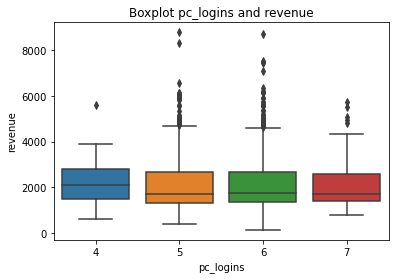

In [14]:
# boxplot

sns.boxplot( x = 'pc_logins',
             y = 'revenue',
             data = chef)
plt.title(label = "Boxplot pc_logins and revenue")

plt.show()

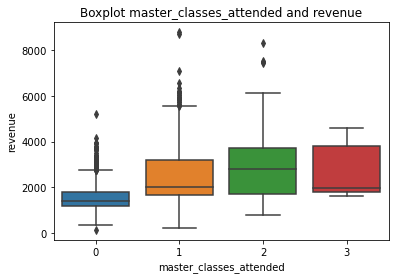

In [15]:
sns.boxplot( x = 'master_classes_attended',
             y = 'revenue',
             data = chef)
plt.title(label = "Boxplot master_classes_attended and revenue")

plt.show()

### Combining features

joining both cancellation features.
- cancellations_after_noon      
- cancellations_before_noon 

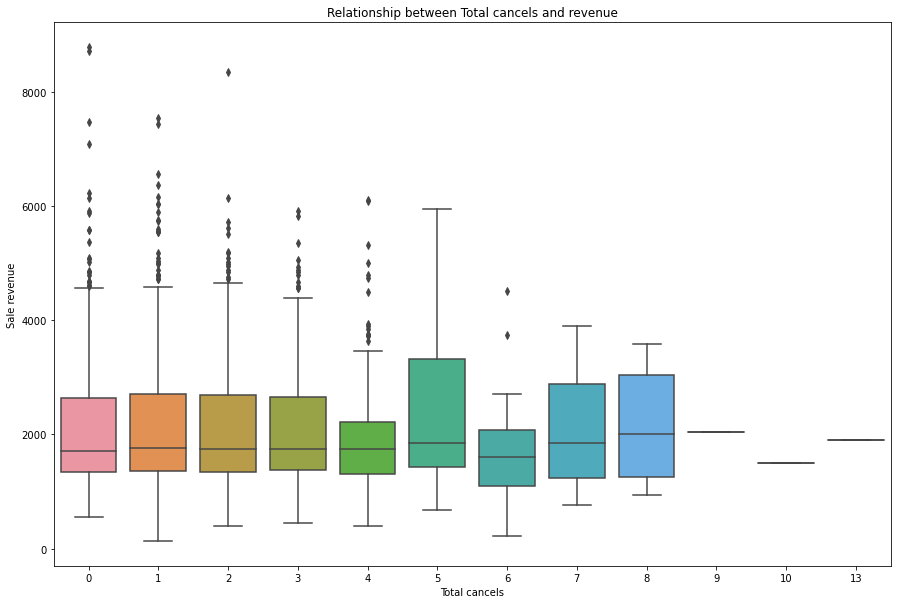


Cancellations

-----------
Total Cancels
-----------
0     572
1     583
2     336
3     224
4     121
5      58
6      28
7      12
8       9
9       1
10      1
13      1
Name: total_cancellations, dtype: int64


---------------------
Cancellation Correlations
---------------------
cancellations_after_noon    -0.04
cancellations_before_noon    0.01
total_cancellations          0.00
revenue                      1.00
Name: revenue, dtype: float64




In [16]:
# total cancels
chef['total_cancellations'] = chef['cancellations_before_noon'] + chef['cancellations_after_noon']


# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
sns.boxplot(x    = 'total_cancellations',
            y    = 'revenue',
            data = chef)



# titles and labels
plt.title(label   = 'Relationship between Total cancels and revenue')
plt.xlabel(xlabel = 'Total cancels')
plt.ylabel(ylabel = 'Sale revenue')


# displaying the plot
plt.tight_layout
plt.show()


## the following code has been written for you ##

# developing a correlation matrix
cancel_corr = chef.loc[ : , ['cancellations_after_noon',
                              'cancellations_before_noon',
                              'total_cancellations',
                              'revenue']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)


# printing value counts and correlations 
print(f"""
Cancellations
=========

-----------
Total Cancels
-----------
{chef['total_cancellations'].value_counts(normalize = False).sort_index()}


---------------------
Cancellation Correlations
---------------------
{cancel_corr['revenue']}

""")


There seems to be no strong relation between revenues and cancellations.

## Encoding Categorical Data
Finding possible data to encode. We are using sample instead of head() to prevent possible misunderstanding due to the ascending order of head. 

In [17]:
chef.sample(5)

,revenue,cross_sell_success,name,email,first_name,family_name,total_meals_ordered,unique_meals_purch,contacts_w_customer_service,product_categories_viewed,avg_time_per_site_visit,mobile_number,cancellations_before_noon,cancellations_after_noon,tastes_and_preferences,pc_logins,mobile_logins,weekly_plan,early_deliveries,late_deliveries,package_locker,refrigerated_locker,avg_prep_vid_time,avg_order_size,master_classes_attended,median_meal_rating,avg_clicks_per_visit,total_photos_viewed,log_revenue,has_cancel_bnoon,has_weekly_plan,has_early_deliveries,has_late_deliveries,has_master_classes_attended,has_total_photos_viewed,total_cancellations
1194,2685.0,1,Brandon Stark (son of Cregan),brandon.stark.(son.of.cregan)@apple.com,Brandon,Stark,87,3,5,8,110.07,1,1,1,1,5,2,12,0,5,0,0,176.1,5,0,3,13,0,3.428944,1,1,0,1,0,0,2
326,1110.0,1,Quort,quort@protonmail.com,Quort,Quort,28,3,8,3,110.51,1,2,0,1,6,1,12,0,2,0,0,98.7,3,0,2,16,504,3.045323,1,1,0,1,0,1,2
346,1740.0,1,Torbert,torbert@nike.com,Torbert,Torbert,127,5,8,8,85.91,1,6,0,1,5,1,2,0,2,1,0,132.4,3,1,3,13,130,3.240549,1,1,0,1,1,1,6
53,910.0,1,Delonne Allyrion,delonne.allyrion@protonmail.com,Delonne,Allyrion,16,7,11,10,56.92,1,1,0,0,5,1,8,3,4,1,1,79.0,2,0,2,17,0,2.959041,1,1,1,1,0,0,1
1613,1400.0,1,Grey King,grey.king@protonmail.com,Grey,King,39,3,8,7,70.56,1,2,1,0,6,2,13,0,3,1,0,179.6,6,1,3,13,415,3.146128,1,1,0,1,1,1,3


#### Categorical Variables to encode
Most categorical variables are already organized. But, we could create new lists for email and name. 
- name: to have an initial approach to gender and categorical variables
- email: to see if there is a relation between work emails, personal, and others.

## Saving the file for now

Since email sorting may require multiple concatenations. We will save the file.

In [18]:
chef.to_excel('./datasets/chef_dataset_2.xlsx', index = False)

## Email 

In [19]:
# importing packages
import random as rand

# loading the new file
file = './datasets/chef_dataset_2.xlsx'
chef_2 = pd.read_excel(io = file)

# setting random seed
rand.seed( a = 219 )

# creating list for precise splitting of emails. Following the case document.
professional_mails = ['@mmm.com','@amex.com', '@apple.com', '@boeing.com',
                      '@caterpillar.com',' @chevron.com', '@cisco.com', 
                      '@cocacola.com', '@disney.com', '@dupont.com',
                      '@exxon.com', '@ge.org', '@goldmansacs.com', 
                      '@homedepot.com', '@ibm.com', '@intel.com', '@jnj.com',
                      '@jpmorgan.com', '@mcdonalds.com', 
                      '@merck.com', '@microsoft.com','@nike.com', 
                      '@pfizer.com', '@pg.com', '@travelers.com', 
                      '@unitedtech.com','@unitedhealth.com', '@verizon.com',
                      '@visa.com', '@walmart.com']

personal_mails = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_mails = ['@me.com', '@aol.com','@hotmail.com','@live.com',
              '@msn.com','@passport.com']




# Checking if it loaded correctly
chef_2.head( n = 5 )

,revenue,cross_sell_success,name,email,first_name,family_name,total_meals_ordered,unique_meals_purch,contacts_w_customer_service,product_categories_viewed,avg_time_per_site_visit,mobile_number,cancellations_before_noon,cancellations_after_noon,tastes_and_preferences,pc_logins,mobile_logins,weekly_plan,early_deliveries,late_deliveries,package_locker,refrigerated_locker,avg_prep_vid_time,avg_order_size,master_classes_attended,median_meal_rating,avg_clicks_per_visit,total_photos_viewed,log_revenue,has_cancel_bnoon,has_weekly_plan,has_early_deliveries,has_late_deliveries,has_master_classes_attended,has_total_photos_viewed,total_cancellations
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,2.594393,1,0,0,1,0,0,4
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,3.135133,0,1,0,1,0,1,0
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,2.903090,1,1,0,1,0,0,3
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,2.778151,1,1,0,1,0,0,2
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,3.173186,0,1,0,1,1,1,0


In [20]:
placeholder_lst = []

for index, col in chef_2.iterrows():
    
    # splitting email domain at '@'
    split_email = chef_2.loc[index, 'email'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [21]:
# value counts for each email.
email_df.iloc[: ,1].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
cocacola.com         28
merck.com            28
jnj.com              28
mcdonalds.com        28
apple.com            27
nike.com             27
ibm.com              26
dupont.com           26
ge.org               26
chevron.com          25
microsoft.com        25
exxon.com            24
travelers.com        24
unitedhealth.com     24
boeing.com           23
verizon.com          22
pg.com               22
mmm.com              22
caterpillar.com      22
disney.com           21
walmart.com          21
visa.com             20
pfizer.com           20
jpmorgan.com         19
goldmansacs.com      18
cisco.com            18
unitedtech.com       18
intel.com            17
homedepot.com        17
Name: 1, dtype: int64

In [22]:
# Appending emails to chef_2
# for future dummy variables with all emails.
domains = email_df[1]

chef_2['domains'] = domains

# Checking if it worked
chef_2[['domains']]

,domains
0,unitedhealth.com
1,ge.org
2,jnj.com
3,ge.org
4,jnj.com
...,...
1941,yahoo.com
1942,yahoo.com
1943,gmail.com
1944,yahoo.com


In [23]:
# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
chef_2 = pd.read_excel(file)


# placeholder list
placeholder_lst = []


# professional_mails
# personal_mails
# junk_mails


# looping to group observations by domain type
for domain in email_df[1]:
        if '@'+ domain in professional_mails :
            placeholder_lst.append('professional')
            
        elif '@' + domain in personal_mails :
            placeholder_lst.append('personal')
        
        elif '@' + domain in junk_mails:
            placeholder_lst.append('junk')
            
        else:
            placeholder_lst.append('unknown')
            

# concatenating with original DataFrame
chef_2['domain_group'] = pd.Series(placeholder_lst)

# checking the results
chef_2['domain_group'].value_counts()

personal        861
professional    671
junk            389
unknown          25
Name: domain_group, dtype: int64

Since unknown has less than 100 obs, we will not use it nor convert it as a dummy variable.

In [24]:
chef_2.head(n=5)

,revenue,cross_sell_success,name,email,first_name,family_name,total_meals_ordered,unique_meals_purch,contacts_w_customer_service,product_categories_viewed,avg_time_per_site_visit,mobile_number,cancellations_before_noon,cancellations_after_noon,tastes_and_preferences,pc_logins,mobile_logins,weekly_plan,early_deliveries,late_deliveries,package_locker,refrigerated_locker,avg_prep_vid_time,avg_order_size,master_classes_attended,median_meal_rating,avg_clicks_per_visit,total_photos_viewed,log_revenue,has_cancel_bnoon,has_weekly_plan,has_early_deliveries,has_late_deliveries,has_master_classes_attended,has_total_photos_viewed,total_cancellations,domain_group
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,2.594393,1,0,0,1,0,0,4,professional
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,3.135133,0,1,0,1,0,1,0,professional
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,2.903090,1,1,0,1,0,0,3,professional
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,2.778151,1,1,0,1,0,0,2,professional
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,3.173186,0,1,0,1,1,1,0,professional


In [25]:
chef_2['first_name'].value_counts(ascending = False)

Jon        21
Jeyne      14
Aegon      12
Alyn       10
Walder     10
           ..
Zei         1
Domeric     1
Vayon       1
Meralyn     1
Dennis      1
Name: first_name, Length: 1442, dtype: int64

In [26]:
chef_2.shape

(1946, 37)

## Gender_Guesser
Using the gender guesser api we will convert 

We have already run this, so the code has been commented out.


In [27]:
# importing packages
# import gender_guesser.detector as gender

# creating an empty list
# placeholder_lst = []
# count = 1946

# loop to guess the gender + a countdown timer
# for name in chef_2['first_name']:
#     guess = gender.Detector(case_sensitive=False).get_gender(name)
#     placeholder_lst.append(guess)
#     print(f"{guess} | names left {count}")
#     count = count - 1    
    
# chef_2['gender_guess'] = pd.Series(placeholder_lst)


#### checkpoint

In [28]:
# saving our progress 
# chef_2.to_excel('./datasets/chef_dataset_3.xlsx', index = False)

In [29]:
file = './datasets/chef_dataset_3.xlsx'
chef_3 = pd.read_excel(io = file)

In [30]:
chef_3.head()

,revenue,cross_sell_success,name,email,first_name,family_name,total_meals_ordered,unique_meals_purch,contacts_w_customer_service,product_categories_viewed,avg_time_per_site_visit,mobile_number,cancellations_before_noon,cancellations_after_noon,tastes_and_preferences,pc_logins,mobile_logins,weekly_plan,early_deliveries,late_deliveries,package_locker,refrigerated_locker,avg_prep_vid_time,avg_order_size,master_classes_attended,median_meal_rating,avg_clicks_per_visit,total_photos_viewed,log_revenue,has_cancel_bnoon,has_weekly_plan,has_early_deliveries,has_late_deliveries,has_master_classes_attended,has_total_photos_viewed,total_cancellations,domain_group,gender_guess
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,2.594393,1,0,0,1,0,0,4,professional,unknown
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,3.135133,0,1,0,1,0,1,0,professional,unknown
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,2.903090,1,1,0,1,0,0,3,professional,unknown
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,2.778151,1,1,0,1,0,0,2,professional,unknown
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,3.173186,0,1,0,1,1,1,0,professional,unknown


In [31]:
chef_3['gender_guess'].value_counts()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [32]:
# Creating custom list for male characters based on random sampling searches
# and the ones with the most value_counts based on the book of ice and fire wiki.

male_list = ['Steffarion' , 'Mance','Hoster','Donnel',
             'Pate','Rawney','Aegon', 'Reznak','Qyle','Meldred','Harmund',
            'Jeffory', 'Vyman' , 'Ferrego', 'Tobho' , 'Weasel' , 'Hubard', 
             'Kurz', 'Flement', 'Humfrey' , 'Orell' , 'Harrag' , 'Shagwell',
            'Walder', 'Alyn', 'Lyonel','Brandon','Rodrik','Robert','Garth',
             'Lucas','Damon','Humfrey'        
,'Qarl','Rickard','Lord','Donnel','Daeron','Addam','Eustace','Wat','Myles'          
,'Denys','Gyles','Mors','Ormond','Jasper','Rolland','Tytos','Owen','Gawen'
,'Leo','Lymond','Willem','Red','Baelor','Gerold','Maron','Quentyn','Martyn'         
,'Symon','Daemon','Kyle','Grazdan','Viserys','Symond','Richard','Raymun'
,'Ronald','Lewys','Samwell','Tywin','Ulf','Walton','Clement','Clarence','Balon'          
,'Edwyn','Quellon','Gulian','Joffrey','Jonos','Benjen','Joss','Ryam'           
,'Tybolt','Wyl','Hugh','Tristifer','Manfred','Alester','Roger','Triston'        
,'Simon','Lothar','Luthor','Desmond','Lorent','Harrold','Bryen','Jaehaerys'      
,'Gwayne','Harren','Dickon','Bryan','Patrek','Jorah'          
,'Dick','Brynden','Tommen','Timett','Olyvar','Ronnel','Roose'          
,'Joseth','Bran','Omer','Torrhen','Roone','Murch','Theon'          
,'Harwin','Harrag','Hoster','Stannis','Cregan','Creighton','Harwood','Harwyn'
,'Harys','Dale','Sandor','Hugo','Osmund','Jaime','Sylas'          
,'Edric','Harbert','Theo','Terrence','Harlan','Jeffory','Dagon'          
,'Eddard','Jate','Jason','Oswell','Harlon','Tregar','Rupert'         
,'Quenton','Elwood','Tristan','Wilbert','Ralf','Andrey','Androw'         
,'Mark','Marwyn','Mathis','Arron','Raymund','Renly','Lester'         
,'Franklyn','Maynard','Raynard','Vickon','Baelon','Lem','Gareth'         
,'Gormond','Gormon','Willis','Aenys','Aerys','Lyman','Yohn','Glendon ',
'Mallor','Lucos',
'Alesander',
'Manfryd',
'Garse',
'Garrett',
'Willow',
'Grey',
'Arthur',
'Tyrion',
'Black',
'Emmon',
'Perwyn',
'Rhaegar',
'Lancel',
'Robb',
'Uthor',
'Benedict',
'Philip',
'Beron',
'Barth',
'Elys',
'Petyr',
'Peter',
'Ormund',
'Parmen',
'Qarro',
'Oro',
'Oznak',
'Orphan',
'Qarlton',
'Qhorin',
'Portifer',
'Qos',
'Orbert',
'Olymer',
'Pearse',
'Quent',
'Quence',
'Ondrew',
'Paxter',
'Orbelo',
'Quaro',
'Ollo',
'Ordello',
'Orell',
'Orivel',
'Orland',
'Orton',
'Patchface',
'Qotho',
'Podrick',
'Plummer',
'Otto',
'Ossifer',
'Polliver',
'Ossy',
'Otter',
'Puckens',
'Pono',
'Othor',
'Otho',
'Preston',
'Prendahl',
'Porridge',
'Praed',
'Oswyn',
'Othell',
'Porther',
'Osney',
'Pudding',
'Osmynd',
'Osbert',
'Ottyn',
'Poul',
'Orwyle',
'Qalen',
'Orys',
'Pypar',
'Pylos',
'Ottomore',
'Pollitor',
'Osfryd',
'Pyg',
'Pycelle',
'Pyat',
'Poetess',
'Puddingfoot',
'Perros',
'Abelar',
'Ollidor',
'Meldred',
'Melicent',
'Melaquin',
'Medgar',
'Meizo',
'Megga',
'Medwick',
'Mellos',
'Melwyn',
'Mikken',
'Michael',
'Mezzara',
'Meryn',
'Merrit',
'Merrett',
'Merrell',
'Mero',
'Merlon',
'Merling',
'Meribald',
'Melwys',
'Medger',
'Mebble',
'Malliard',
'Marghaz',
'Manfrey',
'Mandon',
'Mance',
'Malwyn',
'Malleon',
'Mazdhan',
'Mallador',
'Malcolm',
'Mago',
'Maric',
'Marillion',
'Mawney',
'Matthos',
'Matthar',
'Matt',
'Matrice',
'Mathos',
'Matarys',
'Maslyn',
'Maelor',
'Maegor',
'Marlon',
'Maris',
'Miklaz',
'Nail',
'Nightingale',
'Nettles',
'Nestor',
'Narbo',
'Narbert',
'Mirri',
'Noho',
'Norbert',
'Ogo',
'Ocley',
'Oberyn',
'Nymos',
'Nute',
'Notch',
'Norren',
'Norne',
'Normund',
'Norjen',
'Mychel',
'Mycah',
'Moribald',
'Moreo',
'Moredo',
'Mord',
'Moqorro',
'Moonshadow',
'Moon',
'Monterys',
'Monster',
'Monford',
'Mollos',
'Mollander',
'Mohor',
'Morgarth',
'Moro',
'Muttering',
'Mushroom',
'Quenten',
'Murenmure',
'Munciter',
'Mullin',
'Moryn',
'Morton',
'Mortimer',
'Morros',
'Morrec',
'Murmison',
'Robett',
'Quentin',
'Quhuru',
'Tycho',
'Tybero',
'Turquin',
'Turnip',
'Tumco',
'Tuffleberry',
'Tristimun',
'Tremond',
'Trebor',
'Tothmure',
'Torwynd',
'Torren',
'Torrek',
'Tygett',
'Tyland',
'Umar',
'Urrigon',
'Urreg',
'Urrathon',
'Urek',
'Umfred',
'Ulwyck',
'Tymor',
'Ulrick',
'Ulmer',
'Uller',
'Tyrek',
'Tormund',
'Toregg',
'Torbert',
'Tarle',
'Theodore',
'Theodan',
'Theobald',
'Terro',
'Terrance',
'Ternesio',
'Temmo',
'Tarber',
'Theomore',
'Tanton',
'Tanselle',
'Tallad',
'Tal',
'Theomar',
'Thistle',
'Tommard',
'Tobbot',
'Tomard',
'TomToo',
'Togg',
'Toefinger',
'Todric',
'Todder',
'Tobho',
'Titus',
'Thoren',
'Tion',
'Timoth',
'Timon',
'Timeon',
'Three-Tooth',
'Three',
'Thormor',
'Urron',
'Urswyck',
'Urzen',
'Wolmer',
'Wyman',
'Wylis',
'Wun',
'Wulfe',
'Woth',
'Willum',
'Xaro',
'Willit',
'Willifer',
'William',
'Willas',
'Willamen',
'Whalen',
'Wex',
'Wynton',
'Xhondo',
'Wendello',
'Young',
'Zharaq',
'Zekko',
'Zarabelo',
'Zachery',
'Yormwell',
'Yorko',
'Yorkel',
'Yoren',
'Ygon',
'Yellow',
'Werlag',
'Utherydes',
'Vargo',
'Victor',
'Victarion',
'Veiled',
'Vayon',
'Varys',
'Varly',
'Vardis',
'Varamyr',
'Valarr',
'Val',
'Vaemond',
'Utt',
'Vortimer',
'Wate',
'Weese',
'Weasel',
'Wayn',
'Waymar',
'Watty',
'Watt',
'Warryn',
'Vylarr',
'Walys',
'Waltyr',
'Wallen',
'Wallace',
'Walgrave',
'Waldon',
'Vyman',
'Tagganaro',
'Syrio',
'Rolly',
'Rollam',
'Rolfe',
'Rolder',
'Roland',
'Roggo',
'Rodwell',
'Romny',
'Robar',
'Rob',
'Rigney',
'Rickon',
'Ricasso',
'Rolph',
'Ronel',
'Rhogoro',
'Royce',
'Rusty',
'Rus',
'Runciter',
'Runcel',
'Rugen',
'Rufus',
'Rudge',
'Rowan',
'Ronnet',
'Rossart',
'Roslin',
'Roryn',
'Roro',
'Rorge',
'Ryger',
'Rafford',
'Randyll',
'Ramsay',
'Rakharo',
'Rainbow',
'Ragwyle',
'Ragnor',
'Rafe',
'Rat',
'Racallio',
'Qyle',
'Qyburn',
'Quort',
'Quincy',
'Quill',
'Quickfinger',
'Rast',
'Rhaego',
'Rhaegel',
'Reznak',
'Reysen',
'Reynard',
'Renfred',
'Rawney',
'Regenard',
'Reek',
'Redwyn',
'Redtusk',
'Raynald',
'Raymond',
'Raymar',
'Rycherd',
'Ryk',
'Symeon',
'Skyte',
'Squint',
'Spare',
'Sour',
'Softfoot',
'Smiling',
'Small',
'Sloey',
'Sky',
'Squirrel',
'Skittrick',
'Skinner',
'Skahaz',
'Sigfryd',
'Sigfry',
'Shortear',
'Squinty',
'Stafford',
'Shireen',
'Stygg',
'Sybell',
'Sybassion',
'Styr',
'Stonesnake',
'Stalwart',
'Stonehand',
'Stone',
'Stiv',
'Stevron',
'Steffarion',
'Steely',
'Steelskin',
'Salladhor',
'Sargon',
'Sam',
'Salloreon',
'Sallor',
'Sallei',
"Sailor's",
'Saathos',
'Ryon',
'Rymolf',
'Ryman',
'Ryles',
'Satin',
'Shagwell',
'Serwyn',
'Sawane',
'Selmond',
'Sefton',
'Sedgekins',
'Sebaston',
'Scolera',
'Scarb',
'Sawwood',
'Leobald',
'Daario',
'Cutjack',
'Cuger',
'Criston',
'Cressen',
'Crawn',
'Craster',
'Cragorn',
'Craghas',
'Cotter',
'Cossomo',
'Cosgrove',
'Corlys',
'Coratt',
'Calon',
'Dacks',
'Dareon',
'Danwell',
'Danos',
'Danny',
'Dan',
'Damion',
'Dalbridge',
'Dake',
'Dagos',
'Dagmer',
'Dafyn',
'Daegon',
'Conn',
'Colmar',
'Collio',
'Chayle',
'Cetheres',
'Cerrick',
'Cellador',
'Cedrik',
'Cedric',
'Cayn',
'Castos',
'Cass',
'Carrot',
'Chett',
'Cheyk',
'Clifford',
'Colin',
'Colen',
'Colemon',
'Coldhands',
'Cohollo',
'Clydas',
'Clubfoot',
'Cleyton',
'Chiggen',
'Cley',
'Cletus',
'Cleos',
'Cleon',
'Clayton',
'Clarent',
'Chiswyck',
'Daryn',
'Duncan',
'Edmyn',
'Edmure',
'Edmund',
'Edgerran',
'Eden',
'Eddison',
'Edderion',
'Eddara',
'Ebrose',
'Ebben',
'Easy',
'Dywen',
'Dykk',
'Dyah',
'Durran',
'Duram',
'Dunstan',
'Edrick',
'Edwyd',
'Elron',
'Elmar',
'Eldred',
'Eggon',
'Eldon',
'Eldiss',
'Elder',
'Elbert',
'Egon',
'Dunsen',
'Dunaver',
'Daven',
'Dudley',
'Dobber',
'Dirk',
'Dhazzar',
'Deziel',
'Devan',
'Dermot',
'Denyo',
'Dennis',
'Denestan',
'Delp', ]

female_list = ['Cassella' , 'Aelinor' , 'Leonette' , 'Jeyne' , 'Robin',          
'Walda','Bethany','Alysanne','Rhaenys','Lanna','Alys','Elia'           
,'Serra','Shyra','Ryella','Catelyn','Dalla'          
,'Daella','Daenerys','Nymeria','Joanna','Cersei'         
,'Tansy','Shella','Shiera','Wendel','Arwyn','Leona'
,'Maerie','Lysa','Ysilla','Marg', 'Lyanna',
'Wylla',
'Alyce',
'Alyssa',
'Melara',
'Bessa',
'Kyra',
'Rhaena',
'Rhea',
'Penny',
'Palla',
'Perra',
'Perriane',
'Quaithe',
'Pia',
'Poxy',
'Osha',
'Mellara',
'Melissa',
'Melisandre',
'Meliana',
'Melessa',
'Melesa',
'Mela',
'Meha',
'Meg',
'Meera',
'Mellei',
'Melly',
'Merianne',
'Meredyth',
'Meralyn',
'Olenna',
'Margaery',
'Marei',
'Maggy',
'Mag',
'Margot',
'Marianne',
'Masha',
'Marya',
'Marsella',
'Mariya',
'Marissa',
'Mina',
'Minisa',
'Nella',
'Nan',
'Nage',
'Naerys',
'Mysaria',
'Myrtle',
'Myrielle',
'Myria',
'Myrcella',
'Myranda',
'Nissa',
'Nolla',
'Olene',
'Obella',
'Obara',
'Nysterica',
'Nymella',
'Mylenda',
'Mordane',
'Moelle',
'Missandei',
'Mya',
'Morra',
'Munda',
'Mully',
'Mother',
'Morya',
'Tyana',
'Tya',
'Tumberjon',
'Trystane',
'Tyene',
'Unella',
'Umma',
'Tyta',
'Tysha',
'Tysane',
'Tanda',
'Talla',
'Talea',
'Wynafryd',
'Wynafrei',
'Zia',
'Zhoe',
'Zei',
'Yandry',
'Yna',
'Ygritte',
'Wendell',
'Victaria',
'Visenya',
'Valaena',
'Vaellyn',
'Violet',
'Wendamyr',
'Wenda',
'Taena',
'Roelle',
'Rohanne',
'Robyn',
'Maege',
'Rosey',
'Rosamund',
'Rhonda',
'Rhialta',
'Randa',
'Ravella',
'Rhaelle',
'Rennifer',
'Rhaella',
'Rhae',
'Shirei',
'Shierle',
'Rylene',
'Sarella',
'Sansa',
'Sumner',
'Sylwa',
'Sylva',
'Sybelle',
'Sigrin',
'Sherrit',
'Selyse',
'Sharna',
'Shagga',
'Shae',
'Serala',
'Senelle',
'Selwyn',
'Sarra',
"S'vrone",
'Sarya',
'Saera',
'Maegelle',
'Cynthea',
'Maddy',
'Courtenay',
'Cortnay',
'Corliss',
'Cyrenna',
'Dacey',
'Darla',
'Danelle',
'Dancy',
'Cedra',
'Cassella',
'Cassana',
'Carolei',
'Carellen',
'Chella',
'Cerenna',
'Chataya',
'Conwy',
'Darlessa',
'Daughter',
'Edwyle',
'Eleanor',
'Elyana',
'Ellery',
'Ellaria',
'Elinor',
'Eleyna',
'Elaena',
'Eglantine',
'Denyse',
'Delonne',
'Della',
'Delena',
'Deana',
'Donella',
'Arianne',
'Argrave',
'Anya',
'Annara',
'Caleotte',
'Ambrose',
'Ambrode',
'Amarei',
'Aglantine',
'Aethelmure',
'Aemma',
'Aurane',
'Aubrey',
'Ashara',
'Asha',
'Arya',
'Amabel',
'Alysane',
'Allyria',
'Alla',
'Alia',
'Alerie',
'Baela',
'Brea',
'Brella',
'Johanna',
'Jocelyn',
'Emberlei',
'Kella',
'Kaeth',
'Jynessa',
'Jyanna',
'Jyana',
'Joyeuse',
'Joy',
'Jayne',
'Jayde',
'Berena',
'Bellegere',
'Bellonara',
'Bellena',
'Jorelle',
'Elyn',
'Elza',
'Beth',
'Belandra',
'Becca',
'Barra',
'Barbrey',
'Barbara',
'Barba',
'Bella',
'Bess',
'Janei',
'Janna',
'Jaehaera',
'Jacelyn',
'Loreza',
'Lister',
'Liane',
'Lia',
'Lythene',
'Lyra',
'Lynesse','Lyn','Lyessa','Leyla','Laena','Lady','Kojja','Khorane',
'Leslyn','Leonella','Leana','Layna','Larys','Larraq','Larra',
'Holly','Genna','Gilly','Frenya','Erren','Erreck','Erena','Falia',
'Falena','Emma','Ezzara','Harra','Harma','Helaena','Helly','Helya','Hallyne',
'Grance','Grisella','Grisel','Gretchel','Gysella','Gwynesse','Daena','Daeryssa']


# chef_2.loc[3,'gender_guess'] = 'male2'

# print(chef_2.loc[3,'gender_guess'])


# changing gender from the gender_guess column
chef_3.loc[chef_3['first_name'].isin(male_list), ['gender_guess'] ] = 'male'
chef_3.loc[chef_3['first_name'].isin(female_list), ['gender_guess'] ] = 'female'

    





## Creating Dummy Variables
we will create the follwing dummy variables to help our model
- email -> professional, junk and personal
- gender -> male, female or unknown


In [33]:
# saving our progess so far
# chef_3.to_excel('./datasets/chef_dataset_4.xlsx', index = False)

import pandas as pd

file = './datasets/chef_dataset_4.xlsx'
chef_4 = pd.read_excel(io = './datasets/chef_dataset_4.xlsx')

chef_4.head()

,revenue,cross_sell_success,name,email,first_name,family_name,total_meals_ordered,unique_meals_purch,contacts_w_customer_service,product_categories_viewed,avg_time_per_site_visit,mobile_number,cancellations_before_noon,cancellations_after_noon,tastes_and_preferences,pc_logins,mobile_logins,weekly_plan,early_deliveries,late_deliveries,package_locker,refrigerated_locker,avg_prep_vid_time,avg_order_size,master_classes_attended,median_meal_rating,avg_clicks_per_visit,total_photos_viewed,log_revenue,has_cancel_bnoon,has_weekly_plan,has_early_deliveries,has_late_deliveries,has_master_classes_attended,has_total_photos_viewed,total_cancellations,domain_group,gender_guess
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,2.594393,1,0,0,1,0,0,4,professional,male
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,3.135133,0,1,0,1,0,1,0,professional,female
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,2.903090,1,1,0,1,0,0,3,professional,male
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,2.778151,1,1,0,1,0,0,2,professional,female
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,3.173186,0,1,0,1,1,1,0,professional,female


In [34]:
# creating dummy variables

one_hot_email  = pd.get_dummies(chef_4['domain_group'])
one_hot_gender = pd.get_dummies(chef_4['gender_guess'])

In [35]:
# changing gender unknown to g_unknown to prevent overlap with email unknowns.
one_hot_gender.rename(columns = {'unknown' : 'gender_unknown'}, inplace = True)


In [36]:
# dropping the categorical variables

chef_4 = chef_4.drop('domain_group' , axis = 1)
chef_4 = chef_4.drop('gender_guess' , axis = 1)

# joining codes together

chef_4 = chef_4.join([one_hot_email , one_hot_gender])

# saving new columns
new_columns = chef_4.columns




## Final Save File
Ready for modeling

In [37]:
chef_4.to_excel('./datasets/chef_dataset_5.xlsx', index = False)

## New Changes after model testing

- ~adding has_pc_logins~     
- ~adding has_mobile_logins~
    -  both make no sense since you need to login to create revenue
    -  there are only 16 people who don't have a mobile_login
- adding total_logins


In [38]:
chef = pd.read_excel('./datasets/chef_dataset_5.xlsx')

In [39]:
chef.columns

Index(['revenue', 'cross_sell_success', 'name', 'email', 'first_name',
       'family_name', 'total_meals_ordered', 'unique_meals_purch',
       'contacts_w_customer_service', 'product_categories_viewed',
       'avg_time_per_site_visit', 'mobile_number', 'cancellations_before_noon',
       'cancellations_after_noon', 'tastes_and_preferences', 'pc_logins',
       'mobile_logins', 'weekly_plan', 'early_deliveries', 'late_deliveries',
       'package_locker', 'refrigerated_locker', 'avg_prep_vid_time',
       'avg_order_size', 'master_classes_attended', 'median_meal_rating',
       'avg_clicks_per_visit', 'total_photos_viewed', 'log_revenue',
       'has_cancel_bnoon', 'has_weekly_plan', 'has_early_deliveries',
       'has_late_deliveries', 'has_master_classes_attended',
       'has_total_photos_viewed', 'total_cancellations', 'junk', 'personal',
       'professional', 'unknown', 'andy', 'female', 'male', 'mostly_male',
       'gender_unknown'],
      dtype='object')

In [40]:

chef['over_3_min_prep_time'] = 0

chef['male_with_3_min_prep'] = 0 # cannot repeat for female, less than 100 obs

for index, value in chef.iterrows():

    if chef.loc[index , 'avg_prep_vid_time'] > 180:
        chef.loc[index , 'over_3_min_prep_time'] = 1
    
    if chef.loc[index , 'over_3_min_prep_time'] == 1 and chef.loc[index,'male'] == 1:
        chef.loc[index , 'male_with_3_min_prep'] = 1
        
 
        

    

In [41]:
chef.to_excel('./datasets/chef_dataset_6.xlsx', index = False)

In [42]:
# creating log variables

chef['log_total_meals_ordered'] = np.log10(chef['total_meals_ordered'])
chef['log_contacts_w_customer_service'] = np.log10(chef['contacts_w_customer_service'])
chef['log_avg_prep_vid_time'] = np.log10(chef['avg_prep_vid_time'])
chef['log_median_meal_rating'] = np.log10(chef['median_meal_rating'])
chef['log_total_meals_ordered'] = np.log10(chef['total_meals_ordered'])
chef['log_product_categories_viewed'] = np.log10(chef['product_categories_viewed'])
chef['log_unique_meals_purch'] = np.log10(chef['unique_meals_purch'])

# creating new features for the dataset.
chef['log_meals_ordered_per_avg_vid_time'] = chef['log_avg_prep_vid_time'] / chef['log_total_meals_ordered'] 




In [43]:
# loading the stastmodels and other packages for regressions.
import statsmodels.formula.api as smf  
import sklearn.linear_model

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [44]:
# Preparing the data for the model 

# chef_data = chef.drop(['revenue' , 'log_revenue' , 'name' , 'email' , 
                     #  'first_name' , 'family_name'] , axis = 1)

chef_data = chef[['unique_meals_purch' , 'avg_order_size' , 
                     'median_meal_rating' , 'male_with_3_min_prep',
                     'total_photos_viewed', 'log_total_meals_ordered', 
                     'log_avg_prep_vid_time'  , 'log_contacts_w_customer_service', 
                     'log_unique_meals_purch' , 'log_meals_ordered_per_avg_vid_time']]


# Response variables
chef_target = chef.loc[: , 'revenue']
log_chef_target = chef.loc[: , 'log_revenue']

# Preparing training and testing sets (all letters are lowercase)
# From previous testing we will be using the log_revenue as the target
# since it's distribution appears to be "more normal"
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            log_chef_target,
            test_size = 0.25,
            random_state = 219)

In [45]:
# merging X_train and y_train so that they can be used in statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)


# Building a model
lm_best = smf.ols(formula =  """log_revenue ~ 
unique_meals_purch + 
avg_order_size + 
median_meal_rating + 
male_with_3_min_prep +
total_photos_viewed + 
log_total_meals_ordered +
log_avg_prep_vid_time + 
log_contacts_w_customer_service + 
log_unique_meals_purch +
log_meals_ordered_per_avg_vid_time
""",
                                data = chef_train)


# Fitting the model into the results
results = lm_best.fit()



# Printing the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     489.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:55:44   Log-Likelihood:                 1289.4
No. Observations:                1459   AIC:                            -2557.
Df Residuals:                    1448   BIC:                            -2499.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [46]:
# Final Model

lr = LinearRegression()

# Fitting the training data
lr_fit = lr.fit(x_train, y_train)


# Predictions on new data
lr_pred = lr_fit.predict(x_test)

lr_train_score  =  lr.score(x_train, y_train).round(4)
lr_test_score   =  lr.score(x_test, y_test).round(4)

# Creating a well formated table.

print(f"""
{'~'*40}
\tFinal Model Used
\t\033[1m OLS Regression\033[0m
{'~'*40}

Training Score: {lr_train_score}
Testing  Score: {lr_test_score}

Train-Test Gap: {abs(lr_train_score - lr_test_score).round(4)}

Model Size: 11
Model Coefficients: ['unique_meals_purch' , 'avg_order_size' , 
                     'median_meal_rating' , 'male_with_3_min_prep',
                     'total_photos_viewed', 'log_total_meals_ordered', 
                     'log_avg_prep_vid_time'  , 'log_contacts_w_customer_service', 
                     'log_unique_meals_purch' , 'log_meals_ordered_per_avg_vid_time']

""")


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
	Final Model Used
	 OLS Regression
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Training Score: 0.7718
Testing  Score: 0.7728

Train-Test Gap: 0.001

Model Size: 11
Model Coefficients: ['unique_meals_purch' , 'avg_order_size' , 
                     'median_meal_rating' , 'male_with_3_min_prep',
                     'total_photos_viewed', 'log_total_meals_ordered', 
                     'log_avg_prep_vid_time'  , 'log_contacts_w_customer_service', 
                     'log_unique_meals_purch' , 'log_meals_ordered_per_avg_vid_time']


